In [31]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

print(tf.__version__)
#cool this works with git

1.13.0-dev20181221


\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

In [32]:
model = Sequential()

In [33]:
from tensorflow.keras.layers import Dense

model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(Dense(units=64, activation='relu', input_dim=100))
model.add(Dense(units=10, activation='softmax'))

In [34]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

In [35]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images / 255.0

test_images = test_images / 255.0

model.fit(train_images,train_labels, epochs=5,batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.7521 - acc: 0.7588
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.5149 - acc: 0.8263
Epoch 3/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4692 - acc: 0.8389
Epoch 4/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4442 - acc: 0.8472
Epoch 5/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.4255 - acc: 0.8531


In [36]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

 9376/10000 [===========================>..] - ETA: 0s - loss: 0.4510 - acc: 0.8431

In [37]:
predictions = model.predict(test_images)

In [47]:
predictions[0]
#sum(predictions[0])

array([3.1326774e-05, 2.6694561e-05, 8.0051126e-05, 3.1632266e-05,
       1.4969780e-05, 8.5115217e-02, 1.3452196e-04, 1.9154643e-01,
       4.0055118e-03, 7.1901357e-01], dtype=float32)

In [39]:
test_labels[0]


9

In [42]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

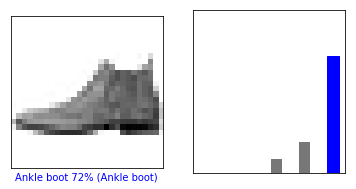

In [45]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import numpy as np
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)